# Probabilstic PCA using PyTorch distributions

### Basic Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import seaborn as sns
import pandas as pd

dist =torch.distributions

sns.reset_defaults()
sns.set_context(context="talk", font_scale=1)
%matplotlib inline
%config InlineBackend.figure_format='retina'

### Generative model for PPCA in PyTorch

In [64]:
data_dim = 2
latent_dim = 1
num_datapoints = 100
z = dist.Normal(
    loc=torch.zeros([latent_dim, num_datapoints]),
    scale=torch.ones([latent_dim, num_datapoints]),)

w = dist.Normal(
    loc=torch.zeros([data_dim, latent_dim]),
    scale=5.0 * torch.ones([data_dim, latent_dim]),
)

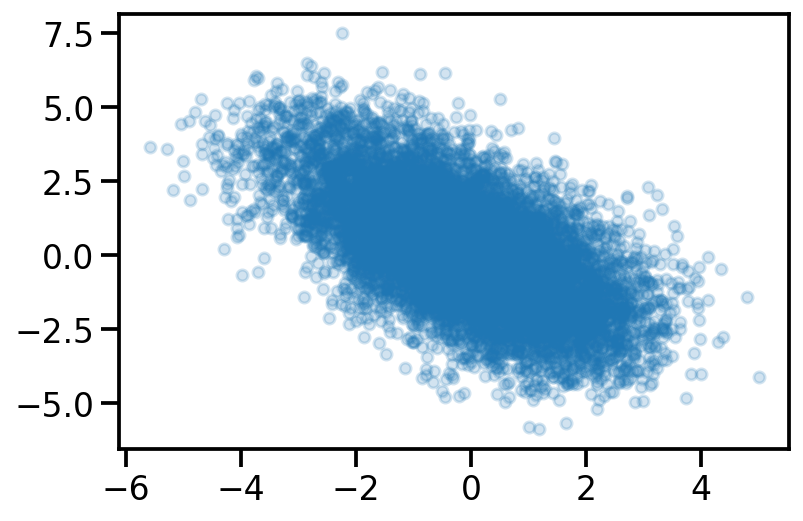

In [65]:
w_sample= w.sample()
z_sample = z.sample()


x = dist.Normal(loc = w_sample@z_sample, scale=1)
x_sample = x.sample([100])
plt.scatter(x_sample[:, 0], x_sample[:, 1], alpha=0.2, s=30)

### Generative model for PPCA in Pyro

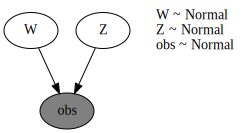

In [66]:
import pyro.distributions as dist
import pyro.distributions.constraints as constraints
import pyro

pyro.clear_param_store()


def ppca_model(data, latent_dim):
    N, data_dim = data.shape
    W = pyro.sample(
        "W",
        dist.Normal(
            loc=torch.zeros([latent_dim, data_dim]),
            scale=5.0 * torch.ones([latent_dim, data_dim]),
        ),
    )
    Z = pyro.sample(
        "Z",
        dist.Normal(
            loc=torch.zeros([N, latent_dim]),
            scale=torch.ones([N, latent_dim]),
        ),
    )

    mean = Z @ W

    return pyro.sample("obs", pyro.distributions.Normal(mean, 1.0), obs=data)


pyro.render_model(
    ppca_model, model_args=(torch.randn(150, 2), 1), render_distributions=True
)

In [68]:
ppca_model(x_sample[0], 3).shape

torch.Size([2, 100])

In [73]:
from pyro import poutine
with pyro.plate("samples", 10, dim=-3):
    trace = poutine.trace(ppca_model).get_trace(x_sample[0], 1)

In [80]:
trace.nodes['W']['value'].squeeze()

torch.Size([10, 100])

In [36]:
data_dim = 3
latent_dim = 2

W = pyro.sample(
        "W",
        dist.Normal(
            loc=torch.zeros([latent_dim, data_dim]),
            scale=5.0 * torch.ones([latent_dim, data_dim]),
        ),
    )

In [37]:
N = 150
Z = pyro.sample(
        "Z",
        dist.Normal(
            loc=torch.zeros([N, latent_dim]),
            scale=torch.ones([N, latent_dim]),
        ),
    )

In [38]:
Z.shape, W.shape

(torch.Size([150, 2]), torch.Size([2, 3]))

In [40]:
(Z@W).shape

torch.Size([150, 3])